In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
csk_ipl=pd.read_csv('C:\\Users\\fcbba\\Desktop\\CSV\csmi.csv')

In [3]:
csk_ipl['PLAYER NAME'][0:5]

0    Narayan Jagadeesan
1       Ruturaj Gaikwad
2               KM Asif
3       Ravindra Jadeja
4               M Vijay
Name: PLAYER NAME, dtype: object

In [4]:
csk_ipl[['PLAYER NAME','COUNTRY']][0:5]

,PLAYER NAME,COUNTRY
0,Narayan Jagadeesan,India
1,Ruturaj Gaikwad,India
2,KM Asif,India
3,Ravindra Jadeja,India
4,M Vijay,India


In [5]:
csk_ipl[['PLAYER NAME','SOLD PRICE']].sort_values('SOLD PRICE')[0:5]

,PLAYER NAME,SOLD PRICE
17,Ben Cutting,50000
2,KM Asif,90000
0,Narayan Jagadeesan,100000
18,Lewis,100000
15,Ishan Kishan,200000


In [6]:
csk_ipl.groupby('AGE')['SOLD PRICE'].mean()

AGE
1     2.000000e+06
2     2.300000e+05
3     2.383333e+06
8     1.233333e+06
10    3.500000e+06
12    6.785714e+06
Name: SOLD PRICE, dtype: float64

In [7]:
soldprice_by_age=csk_ipl.groupby('AGE')['SOLD PRICE'].mean().reset_index()

In [8]:
soldprice_by_age

,AGE,SOLD PRICE
0,1,2.000000e+06
1,2,2.300000e+05
2,3,2.383333e+06
3,8,1.233333e+06
4,10,3.500000e+06
5,12,6.785714e+06


In [9]:
soldprice_by_age_role=csk_ipl.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()

In [10]:
soldprice_by_age_role

,AGE,PLAYING ROLE,SOLD PRICE
0,1,Bowler,2000000
1,2,Batsman,500000
2,2,Bowler,90000
3,2,Wicketkeeper,100000
4,3,All-Rounder,50000
5,3,Batsman,3550000
6,8,All-Rounder,1750000
7,8,Batsman,200000
8,10,All-Rounder,5000000
9,10,Batsman,2000000


In [11]:
soldprice_comparison=soldprice_by_age_role.merge(soldprice_by_age,on='AGE',how='outer')

In [12]:
soldprice_comparison

,AGE,PLAYING ROLE,SOLD PRICE_x,SOLD PRICE_y
0,1,Bowler,2000000,2.000000e+06
1,2,Batsman,500000,2.300000e+05
2,2,Bowler,90000,2.300000e+05
3,2,Wicketkeeper,100000,2.300000e+05
4,3,All-Rounder,50000,2.383333e+06
5,3,Batsman,3550000,2.383333e+06
6,8,All-Rounder,1750000,1.233333e+06
7,8,Batsman,200000,1.233333e+06
8,10,All-Rounder,5000000,3.500000e+06
9,10,Batsman,2000000,3.500000e+06


In [13]:
soldprice_comparison.rename(columns={'SOLD PRICE_x': 'SOLD_PRICE_AGE_ROLE','SOLD PRICE_y':'SOLD_PRICE_AGE'},inplace=True)

In [14]:
soldprice_comparison.head(5)

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE
0,1,Bowler,2000000,2.000000e+06
1,2,Batsman,500000,2.300000e+05
2,2,Bowler,90000,2.300000e+05
3,2,Wicketkeeper,100000,2.300000e+05
4,3,All-Rounder,50000,2.383333e+06


In [15]:
soldprice_comparison['change']=soldprice_comparison.apply(lambda rec:(rec.SOLD_PRICE_AGE_ROLE-rec.SOLD_PRICE_AGE)/rec.SOLD_PRICE_AGE,axis=1)

In [16]:
soldprice_comparison

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE,change
0,1,Bowler,2000000,2.000000e+06,0.000000
1,2,Batsman,500000,2.300000e+05,1.173913
2,2,Bowler,90000,2.300000e+05,-0.608696
3,2,Wicketkeeper,100000,2.300000e+05,-0.565217
4,3,All-Rounder,50000,2.383333e+06,-0.979021
5,3,Batsman,3550000,2.383333e+06,0.489510
6,8,All-Rounder,1750000,1.233333e+06,0.418919
7,8,Batsman,200000,1.233333e+06,-0.837838
8,10,All-Rounder,5000000,3.500000e+06,0.428571
9,10,Batsman,2000000,3.500000e+06,-0.428571


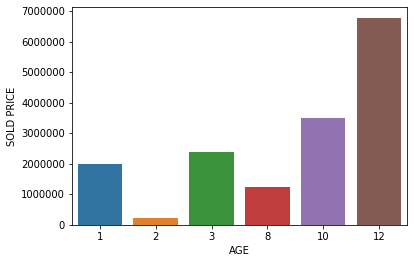

In [17]:
sn.barplot(x='AGE',y='SOLD PRICE',data=soldprice_by_age)

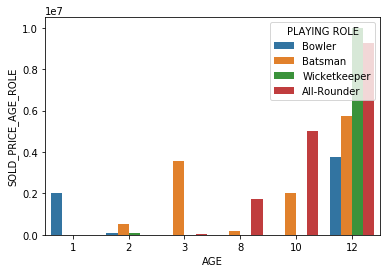

In [19]:
sn.barplot(x='AGE',y='SOLD_PRICE_AGE_ROLE',hue='PLAYING ROLE',data=soldprice_comparison)

(array([7., 1., 0., 2., 2., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0.,
        2., 1., 1.]),
 array([   50000.,   547500.,  1045000.,  1542500.,  2040000.,  2537500.,
         3035000.,  3532500.,  4030000.,  4527500.,  5025000.,  5522500.,
         6020000.,  6517500.,  7015000.,  7512500.,  8010000.,  8507500.,
         9005000.,  9502500., 10000000.]),
 <a list of 20 Patch objects>)

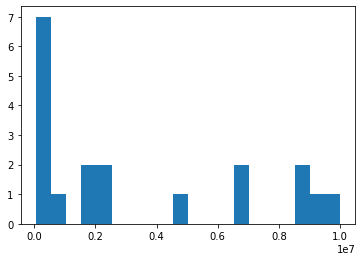

In [20]:
plt.hist(csk_ipl['SOLD PRICE'],bins=20)

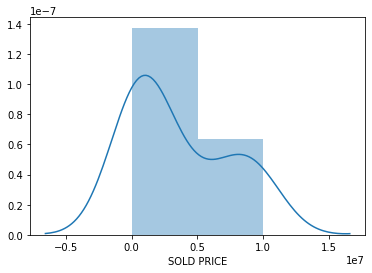

In [21]:
sn.distplot(csk_ipl['SOLD PRICE'])

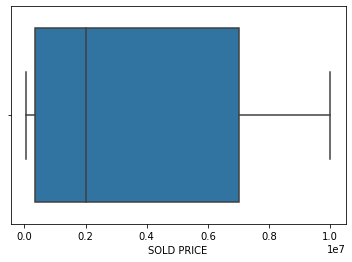

In [22]:
sn.boxplot(csk_ipl['SOLD PRICE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ce3cc63f88>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce3cc91f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce3cc63608>],
 'medians': [<matplotlib.lines.Line2D at 0x2ce3cc96ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ce3cc96fc8>],
 'means': []}

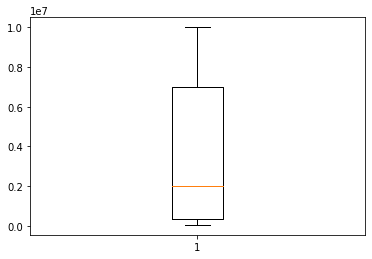

In [23]:
box=plt.boxplot(csk_ipl['SOLD PRICE'])
box

In [24]:
[item.get_ydata()[0] for item in box['caps']]

[50000.0, 10000000.0]

In [25]:
[item.get_ydata()[0] for item in box['whiskers']]

[350000.0, 7000000.0]

In [26]:
[item.get_ydata()[0] for item in box['medians']]

[2000000.0]

In [27]:
csk_ipl[csk_ipl['SOLD PRICE']>250000][['COUNTRY','TEAM','PLAYING ROLE']]

,COUNTRY,TEAM,PLAYING ROLE
1,India,CSK,Batsman
3,India,CSK,All-Rounder
4,India,CSK,Batsman
5,India,CSK,Wicketkeeper
6,Australia,CSK,Bowler
7,India,CSK,Bowler
8,India,CSK,Bowler
9,South Africa,MI,Batsman
10,India,MI,Batsman
11,India,MI,Batsman


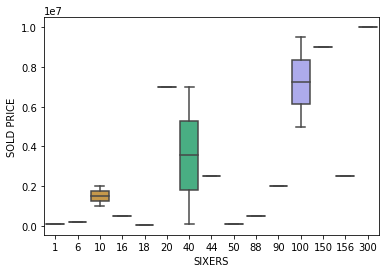

In [28]:
sn.boxplot(x='SIXERS',y='SOLD PRICE',data=csk_ipl)

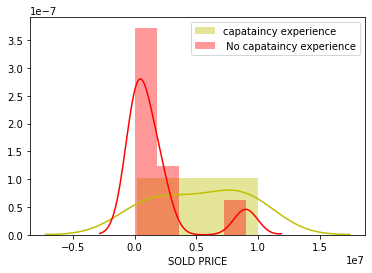

In [29]:
sn.distplot(csk_ipl[csk_ipl['CAPTAINCY EXP']==1]['SOLD PRICE'],color='y',label='capataincy experience')
sn.distplot(csk_ipl[csk_ipl['CAPTAINCY EXP']==0]['SOLD PRICE'],color='r',label=' No capataincy experience')
plt.legend()

In [32]:
csk_batsman=csk_ipl[csk_ipl['PLAYING ROLE']=='Batsman']
csk_batsman

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WICKETS,CAPTAINCY EXP,RUNS-S,SIXERS,HS,AVG,SR-B,WKTS,AUCTION YEAR,BASE YEAR,SOLD PRICE
1,Ruturaj Gaikwad,2,India,CSK,Batsman,590,0,1,843,88,83,33.0,135.0,0,2019,100000,500000
4,M Vijay,12,India,CSK,Batsman,2587,0,1,3000,156,126,30.0,110.0,0,2011,1000000,2500000
9,Quinton de Kock,3,South Africa,MI,Batsman,1012,0,1,400,40,100,30.4,130.0,0,2014,3000000,7000000
10,Suryakumar Yadav,10,India,MI,Batsman,1400,3,0,590,90,80,31.0,160.0,3,2009,1000000,2000000
11,Rohit Sharma,12,India,MI,Batsman,5030,8,1,4000,150,120,45.0,170.0,8,2009,1000000,9000000
15,Ishan Kishan,8,India,MI,Batsman,900,0,1,290,6,89,24.0,140.0,0,2013,90000,200000
18,Lewis,3,West Indies,MI,Batsman,870,0,0,450,50,50,30.0,110.0,0,2014,10000,100000


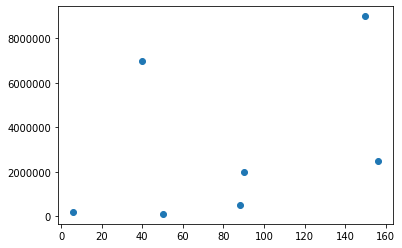

In [42]:
plt.scatter(x='SIXERS',y='SOLD PRICE',data=csk_batsman)

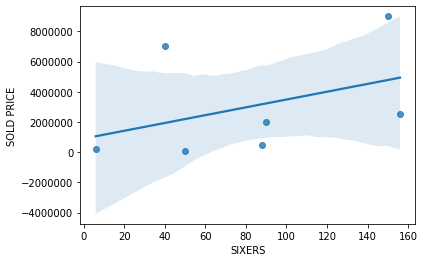

In [40]:
sn.regplot(x='SIXERS',y='SOLD PRICE',data=csk_batsman)

C:\Users\fcbba\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


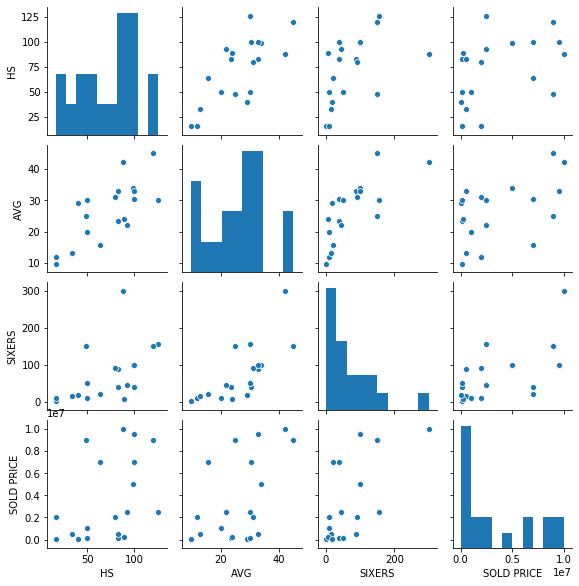

In [44]:
influential=['HS','AVG','SIXERS','SOLD PRICE']
sn.pairplot(csk_ipl[influential],size=2)

In [45]:
csk_ipl[influential].corr()

,HS,AVG,SIXERS,SOLD PRICE
HS,1.000000,0.731988,0.508433,0.422155
AVG,0.731988,1.000000,0.737645,0.506887
SIXERS,0.508433,0.737645,1.000000,0.660760
SOLD PRICE,0.422155,0.506887,0.660760,1.000000


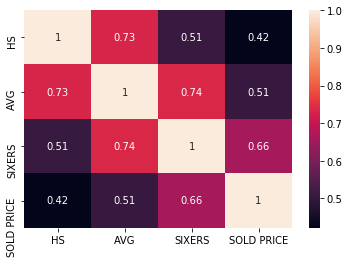

In [46]:
sn.heatmap(csk_ipl[influential].corr(),annot=True)